In [66]:
# ライブラリの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from pathlib import Path

from PIL import Image

import tensorflow as tf
import tensorflow.keras as keras

In [67]:
# データの作成
album_classes = ["No gingivitis", "Gingivitis Lv.1", "Gingivitis Lv.2-3"]
num_classes = len(album_classes)
IMAGE_SIZE = 224

data = []

path_ = './Images3'

for num in os.listdir(path_):
    for img_path in os.listdir(f'{path_}/{num}'):
        data.append([f'{path_}/{num}/{img_path}', img_path, album_classes[int(num)], int(num)])

df = pd.DataFrame(data, columns=['path', 'filename', 'category', 'label'])

df

,path,filename,category,label
0,./Images3/0/31-0.jpg,31-0.jpg,No gingivitis,0
1,./Images3/0/73-0-2.jpg,73-0-2.jpg,No gingivitis,0
2,./Images3/0/c-63-0.jpg,c-63-0.jpg,No gingivitis,0
3,./Images3/0/c103-0-2.jpg,c103-0-2.jpg,No gingivitis,0
4,./Images3/0/c103-0.jpg,c103-0.jpg,No gingivitis,0
...,...,...,...,...
214,./Images3/2/c99-3.jpg,c99-3.jpg,Gingivitis Lv.2-3,2
215,./Images3/2/d10-3.jpg,d10-3.jpg,Gingivitis Lv.2-3,2
216,./Images3/2/d19-2.jpg,d19-2.jpg,Gingivitis Lv.2-3,2
217,./Images3/2/d3-2.jpg,d3-2.jpg,Gingivitis Lv.2-3,2


In [68]:
# trainとtestに先に分ける
df_test = df.sample(frac=0.2)
df_train = df.drop(df_test.index)
display(df_train)
display(df_test)


,path,filename,category,label
0,./Images3/0/31-0.jpg,31-0.jpg,No gingivitis,0
1,./Images3/0/73-0-2.jpg,73-0-2.jpg,No gingivitis,0
2,./Images3/0/c-63-0.jpg,c-63-0.jpg,No gingivitis,0
3,./Images3/0/c103-0-2.jpg,c103-0-2.jpg,No gingivitis,0
4,./Images3/0/c103-0.jpg,c103-0.jpg,No gingivitis,0
...,...,...,...,...
213,./Images3/2/c99-3-2.jpg,c99-3-2.jpg,Gingivitis Lv.2-3,2
214,./Images3/2/c99-3.jpg,c99-3.jpg,Gingivitis Lv.2-3,2
215,./Images3/2/d10-3.jpg,d10-3.jpg,Gingivitis Lv.2-3,2
216,./Images3/2/d19-2.jpg,d19-2.jpg,Gingivitis Lv.2-3,2


,path,filename,category,label
185,./Images3/2/C30-2.jpg,C30-2.jpg,Gingivitis Lv.2-3,2
156,./Images3/1/d70-1.jpg,d70-1.jpg,Gingivitis Lv.1,1
13,./Images3/0/c35-0.jpg,c35-0.jpg,No gingivitis,0
202,./Images3/2/c69-2.jpg,c69-2.jpg,Gingivitis Lv.2-3,2
105,./Images3/1/c48-1.jpg,c48-1.jpg,Gingivitis Lv.1,1
121,./Images3/1/c64-1-2.jpg,c64-1-2.jpg,Gingivitis Lv.1,1
22,./Images3/0/c74-0-2.jpg,c74-0-2.jpg,No gingivitis,0
103,./Images3/1/c44-1.jpg,c44-1.jpg,Gingivitis Lv.1,1
160,./Images3/1/d77-1.jpg,d77-1.jpg,Gingivitis Lv.1,1
47,./Images3/0/d58-0.jpg,d58-0.jpg,No gingivitis,0


In [69]:
def dataset(df, input_size = IMAGE_SIZE):
    X = [] # image file
    Y = [] # correct label
    for index, data in df.iterrows():
        image_path = data["path"]
        img = Image.open(image_path)
        img = img.resize((input_size,input_size))
        img = np.asarray(img)
        X.append(img)
        Y.append(data["label"])
    return np.array(X), np.array(Y)

X_train, y_train = dataset(df_train)
X_test, y_test = dataset(df_test)

print(type(X_train))
print(X_train.shape)
print(type(y_train))
print(y_train.shape)
# xy = (X_train, X_test, y_train, y_test)
# np.save('./image_files.npy', xy)

<class 'numpy.ndarray'>
(175, 224, 224, 3)
<class 'numpy.ndarray'>
(175,)


In [109]:
np.save('./X_test', X_test)
np

In [70]:
from keras.utils import np_utils

# X_train, X_test, y_train, y_test = np.load(PATH + 'image_files.npy', allow_pickle=True)
# convert one-hot vector
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# normalization
# X_train = (X_train.astype('float') / 255.0-0.5)/0.5
# X_test = (X_test.astype('float') / 255.0-0.5)/0.5

# X_train = X_train.astype('float') / 255.0
# X_test = X_test.astype('float') / 255.0

X_train_norm = np.zeros((len(X_train), IMAGE_SIZE, IMAGE_SIZE, 3))
X_test_norm = np.zeros((len(X_test), IMAGE_SIZE, IMAGE_SIZE, 3))

for i in range(len(X_train)):
    X_train_norm[i] = (X_train[i] - X_train[i].min()) / (X_train[i].max() - X_train[i].min())

for i in range(len(X_test)):
    X_test_norm[i] = (X_test[i] - X_test[i].min()) / (X_test[i].max() - X_test[i].min())



# print(type(X_train_norm))
# print(X_train_norm.shape)
# print(X_train_norm[0])
# print(type(y_train))
# print(y_train.shape)

In [111]:
np.save('./X_test_norm', X_test_norm)
np.save('./y_test', y_test)

In [71]:
# params = {
#     'samplewise_center': True,
#     'samplewise_std_normalization':True,
#     'zoom_range': [0.8, 1.2],
#     'rotation_range': 30,
#     'vertical_flip': True,
#     'horizontal_flip': True,
#     # 'height_shift_range': 0.0,
#     # 'width_shift_range': 0.0,
#     # 'shear_range': 0,
# }
generator = keras.preprocessing.image.ImageDataGenerator(
    # samplewise_center=True,
    # samplewise_std_normalization=True,
    # zoom_range=[0.8, 1.2],
    rotation_range=22.5,
    vertical_flip=True,
    horizontal_flip=True)
train_iter = generator.flow(x=X_train_norm, y=y_train)

generator2 = keras.preprocessing.image.ImageDataGenerator(
    # samplewise_center=True,
    # samplewise_std_normalization=True
    )
test_iter = generator.flow(x=X_test_norm, y=y_test)


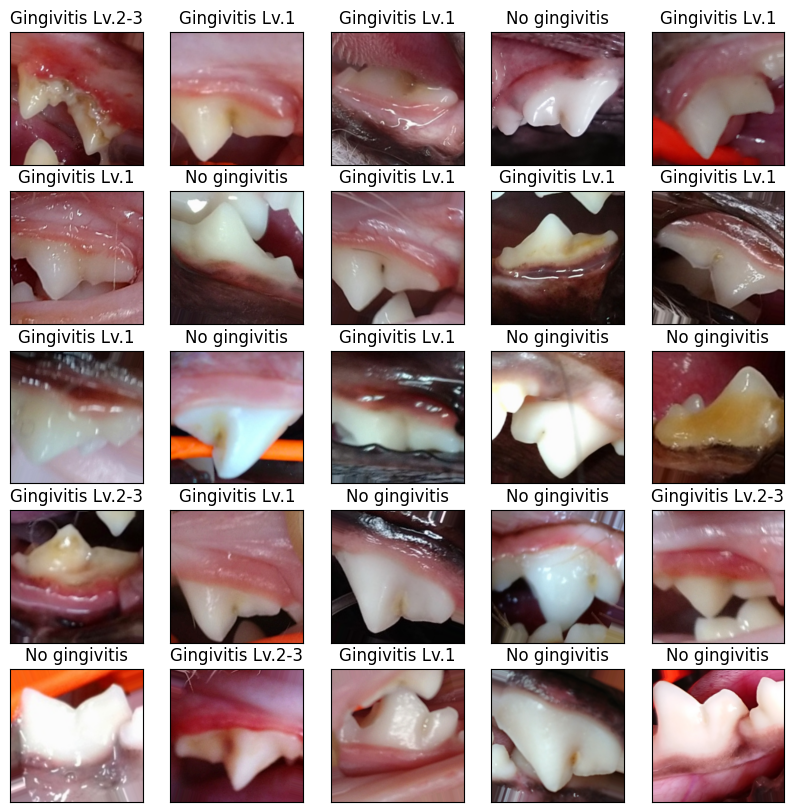

In [72]:
n_image = 25  # 表示する画像の数
images, labels = next(train_iter)  # 最初のバッチを取り出す

plt.figure(figsize=(10, 10))  # 画像の表示サイズ
for i in range(n_image):
    plt.subplot(5, 5, i + 1)
    plt.imshow((np.array(images[i])))
    label = album_classes[np.argmax(labels[i])]  #hot-oneを戻すargmax
    plt.title(label)
    plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)  # ラベルとメモリを非表示に



In [73]:
# モデルの作成
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2S

EfficientNetV2S_model = EfficientNetV2S(
    weights='imagenet',
    include_top=False,
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)
)

In [74]:
from keras.layers import Dense, Input, GlobalAveragePooling2D, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import CSVLogger
from keras.models import Model
from keras.models import Sequential

In [75]:
# 全結合層の構築
top_model = Sequential()
top_model.add(GlobalAveragePooling2D())
top_model.add(Dense(1024, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(num_classes, activation='softmax'))

In [76]:
# VGG16と構築した全結合層を結合
model = Model(inputs=EfficientNetV2S_model.input, outputs=top_model(EfficientNetV2S_model.output))
csvlogger_cb = CSVLogger('./history.csv')

optimizer = RMSprop()
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [77]:
model.summary()
# len(model.layers)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_4 (Rescaling)        (None, 224, 224, 3)  0           ['input_5[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 24  648         ['rescaling_4[0][0]']            
                                )                                                                 
                                                                                            

In [78]:
# for layer in model.layers[:-2]:
#     layer.trainable = False

In [79]:
from keras.callbacks import LearningRateScheduler
# 学習率
def step_decay(epoch):
    x = 0.000001
    if epoch >= 1000: x = 0.000001
    if epoch >= 2000: x = 0.000001
    return x
lr_decay = LearningRateScheduler(step_decay)

In [80]:
print('\v')

In [81]:
history = model.fit(
    train_iter,
    epochs=1000,
    batch_size=64,
    validation_data=test_iter,
    callbacks=[lr_decay]
    )

Epoch 1/1000
6/6 [==============================] - 25s 739ms/step - loss: 1.1822 - accuracy: 0.3371 - val_loss: 1.1104 - val_accuracy: 0.2273 - lr: 1.0000e-06
Epoch 2/1000
6/6 [==============================] - 2s 296ms/step - loss: 1.1415 - accuracy: 0.3314 - val_loss: 1.1219 - val_accuracy: 0.2727 - lr: 1.0000e-06
Epoch 3/1000
6/6 [==============================] - 2s 268ms/step - loss: 1.1656 - accuracy: 0.3314 - val_loss: 1.1191 - val_accuracy: 0.2727 - lr: 1.0000e-06
Epoch 4/1000
6/6 [==============================] - 2s 291ms/step - loss: 1.1293 - accuracy: 0.3543 - val_loss: 1.1390 - val_accuracy: 0.2727 - lr: 1.0000e-06
Epoch 5/1000
6/6 [==============================] - 2s 278ms/step - loss: 1.1557 - accuracy: 0.2571 - val_loss: 1.1364 - val_accuracy: 0.2727 - lr: 1.0000e-06
Epoch 6/1000
6/6 [==============================] - 2s 291ms/step - loss: 1.1788 - accuracy: 0.2800 - val_loss: 1.1937 - val_accuracy: 0.2727 - lr: 1.0000e-06
Epoch 7/1000
6/6 [===========================

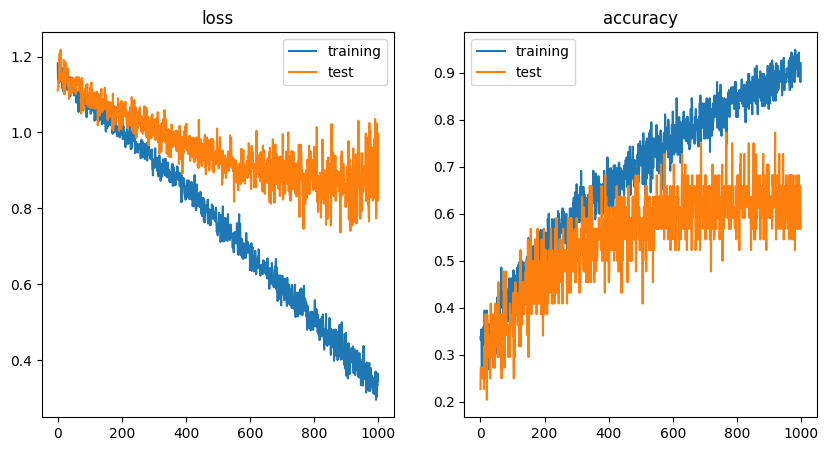

In [82]:
metrics = ['loss', 'accuracy']  # 使用する評価関数を指定

plt.figure(figsize=(10, 5))  # グラフを表示するスペースを用意

for i in range(len(metrics)):

    metric = metrics[i]

    plt.subplot(1, 2, i+1)  # figureを1×2のスペースに分け、i+1番目のスペースを使う
    plt.title(metric)  # グラフのタイトルを表示

    plt_train = history.history[metric]  # historyから訓練データの評価を取り出す
    plt_test = history.history['val_' + metric]  # historyからテストデータの評価を取り出す

    plt.plot(plt_train, label='training')  # 訓練データの評価をグラフにプロット
    plt.plot(plt_test, label='test')  # テストデータの評価をグラフにプロット
    plt.legend()  # ラベルの表示

plt.show()  # グラフの表示

In [83]:
# score = model.evaluate(X_test, y_test, batch_size=32)
# print('loss: {0} - acc: {1}'.format(score[0], score[1]))

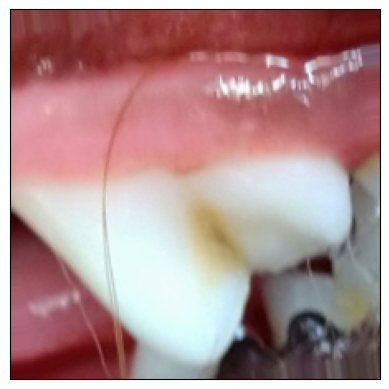

1/1 [==============================] - 0s 32ms/step
[[0.86960095 0.08112197 0.04927713]]
正解: No gingivitis 予測結果: No gingivitis


In [108]:
images, labels = next(test_iter)  # サンプルを1つだけ取り出す

plt.imshow((np.array(images[0])))  # チャンネルを一番後ろに
plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)  # ラベルとメモリを非表示に
plt.show()

image = tf.reshape(images[0], [1, 224, 224, 3])
pred = model.predict(image)
print(pred)
print("正解:", album_classes[np.argmax(labels[0])],
      "予測結果:", album_classes[np.argmax(pred)])

In [110]:
model.save('./my_model_EN_adam.h5')

In [86]:
# モデル全体を SavedModel として保存
# model.save('saved_model/my_model_EN')

In [87]:
# 保存したモデルを推論に使うのみであれば、以下のように学習に必要な情報を省略して保存することで、ファイルの大きさが半分程度になる。大体の場合はこれでエラーが出なくなる。
# model.save('test_model_EN.h5',  include_optimizer=False)